In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
import tensorflow as tf

In [ ]:
newMat = pd.read_csv('/content/drive/MyDrive/Documents/UTEP/3rd Sem/Graduate research new_code/newMat_CSV.csv')

In [ ]:
newMat

,dp,dx,k2,k3,k4,k5,k6,k7,k8,k9,PP0,B0,sumClot,maxHeight,LagT,ETP,Cmax,Tmax,clot_size
0,703.355,0.220495,0.000012,2.370500e-07,0.000482,0.000020,0.000004,1.181680e-10,3.692580e-10,0.020202,1385.25,134.310,4440.68,0.0,2.325000,854.167038,50.543897,24.350000,0
1,715.103,0.227286,0.000010,2.277300e-07,0.000464,0.000019,0.000004,1.311100e-10,4.344110e-10,0.021096,1450.93,133.434,3365.83,0.0,2.391667,735.767126,42.519202,26.641667,0
2,628.882,0.257888,0.000010,2.628810e-07,0.000522,0.000017,0.000004,1.240010e-10,4.065420e-10,0.021132,1376.71,136.873,5599.67,0.0,2.658333,553.294675,32.737451,29.775000,0
3,542.294,0.139077,0.000011,2.490990e-07,0.000436,0.000017,0.000004,1.168780e-10,4.194810e-10,0.021173,1442.96,126.789,3355.50,0.0,2.708333,593.556719,35.569647,29.466667,0
4,310.933,0.148333,0.000010,2.400490e-07,0.000514,0.000019,0.000004,1.172680e-10,4.038340e-10,0.022095,1370.79,126.351,165721.00,5.0,2.616667,535.849464,30.728191,29.275000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,319.908,0.286154,0.000011,2.494290e-07,0.000466,0.000017,0.000004,1.355490e-10,3.676460e-10,0.018645,1327.53,126.362,309529.00,6.0,2.683333,653.734867,39.278895,28.875000,1
3548,288.369,0.367184,0.000012,2.271410e-07,0.000438,0.000019,0.000004,1.397520e-10,4.390840e-10,0.019049,1538.97,138.498,520793.00,7.0,2.075000,1190.098502,87.923754,20.941667,1
3549,260.578,0.151167,0.000010,2.295580e-07,0.000459,0.000018,0.000004,1.184200e-10,3.892140e-10,0.019481,1332.73,123.871,251406.00,6.0,2.683333,591.656365,35.119884,29.525000,1
3550,676.764,0.334048,0.000010,2.404450e-07,0.000517,0.000018,0.000004,1.371150e-10,4.025380e-10,0.019543,1400.80,127.467,6758.98,0.0,2.558333,673.807792,40.078959,28.516667,0


In [ ]:
from sklearn.metrics import accuracy_score
res = tf.feature_column.categorical_column_with_vocabulary_list("clot_size", [0, 1])

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [ ]:
dp = tf.feature_column.numeric_column("dp")
dx = tf.feature_column.numeric_column("dx")
LagT = tf.feature_column.numeric_column("LagT")
ETP = tf.feature_column.numeric_column("ETP")
Cmax = tf.feature_column.numeric_column("Cmax")
Tmax = tf.feature_column.numeric_column("Tmax")

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [ ]:
from sklearn.model_selection import train_test_split
x_data = newMat[["dp", "dx", "LagT", "ETP", "Cmax", "Tmax"]]
y_labels = newMat['clot_size']
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.3,random_state=101)
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.3,random_state=101)

In [ ]:
y_train = pd.to_numeric(y_train, downcast='integer')
y_test = pd.to_numeric(y_test, downcast = 'integer')
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
feat_cols = [dp, dx, LagT, ETP, Cmax, Tmax]

# DNN
## (500, 250, 100)

In [ ]:
input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,
                                               y=y_train,
                                               batch_size=200,
                                               num_epochs=None,
                                               shuffle=True)


Instructions for updating:
Use tf.keras instead.


In [ ]:
from sklearn import svm, datasets, metrics


In [ ]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [ ]:
from tensorflow.keras.optimizers import legacy

model = tf.estimator.DNNClassifier(feature_columns=feat_cols, optimizer = legacy.Adam,
                                          hidden_units=[500, 250, 100],
                                          #dropout=0.025,
                                          #activation_fn = tf.nn.softmax,
                                          #optimizer='Adagrad',
                                          n_classes=2)

Instructions for updating:
Use tf.keras instead.


In [ ]:
y_test_n = y_test.to_numpy()

In [ ]:
print("Training model...")
print("LogLoss error (on validation data):")
validation_errors = []
for period in range (0, 200):
# Train the model, starting from the prior state.
    model.train(
    input_fn=input_func,
    steps=500
    )
    pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
    y_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=y_test,batch_size=len(y_test),shuffle=False)

    validation_predictions = list(model.predict(input_fn=pred_fn))
    validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])
    validation_pred_class_id = np.array([item['class_ids'][0] for item in validation_predictions])
    validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,0)
    validation_log_loss = metrics.log_loss(y_test_n, validation_pred_one_hot)
    print(" period %02d : %0.2f" % (period, validation_log_loss))
    validation_errors.append(validation_log_loss)


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Training model...
LogLoss error (on validation data):


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


 period 00 : 3.44


Instructions for updating:
Use standard file utilities to get mtimes.


 period 01 : 2.51
 period 02 : 3.04
 period 03 : 2.36


Instructions for updating:
Use standard file APIs to delete files with this prefix.


 period 04 : 2.69
 period 05 : 2.39
 period 06 : 2.45
 period 07 : 2.29
 period 08 : 2.02
 period 09 : 2.17
 period 10 : 1.72
 period 11 : 1.30
 period 12 : 1.50
 period 13 : 1.50
 period 14 : 1.81
 period 15 : 1.50
 period 16 : 1.54
 period 17 : 1.73
 period 18 : 1.06
 period 19 : 1.08
 period 20 : 1.76
 period 21 : 1.15
 period 22 : 1.06
 period 23 : 1.63
 period 24 : 1.12
 period 25 : 1.27
 period 26 : 1.17
 period 27 : 1.21
 period 28 : 1.12
 period 29 : 1.02
 period 30 : 2.24
 period 31 : 1.29
 period 32 : 1.12
 period 33 : 1.27
 period 34 : 1.44
 period 35 : 1.14
 period 36 : 1.42
 period 37 : 0.91
 period 38 : 0.99
 period 39 : 1.02
 period 40 : 1.00
 period 41 : 1.75
 period 42 : 1.27
 period 43 : 1.35
 period 44 : 0.87
 period 45 : 1.44
 period 46 : 1.05
 period 47 : 1.27
 period 48 : 1.05
 period 49 : 1.02
 period 50 : 0.97
 period 51 : 1.41
 period 52 : 0.94
 period 53 : 1.14
 period 54 : 1.42
 period 55 : 1.03
 period 56 : 0.94
 period 57 : 0.94
 period 58 : 1.24
 period 59

In [ ]:
final_predictions = model.predict(input_fn=pred_fn)
final_predictions = np.array([item['class_ids'][0] for item in final_predictions])


Final accuracy (on validation data): 0.93


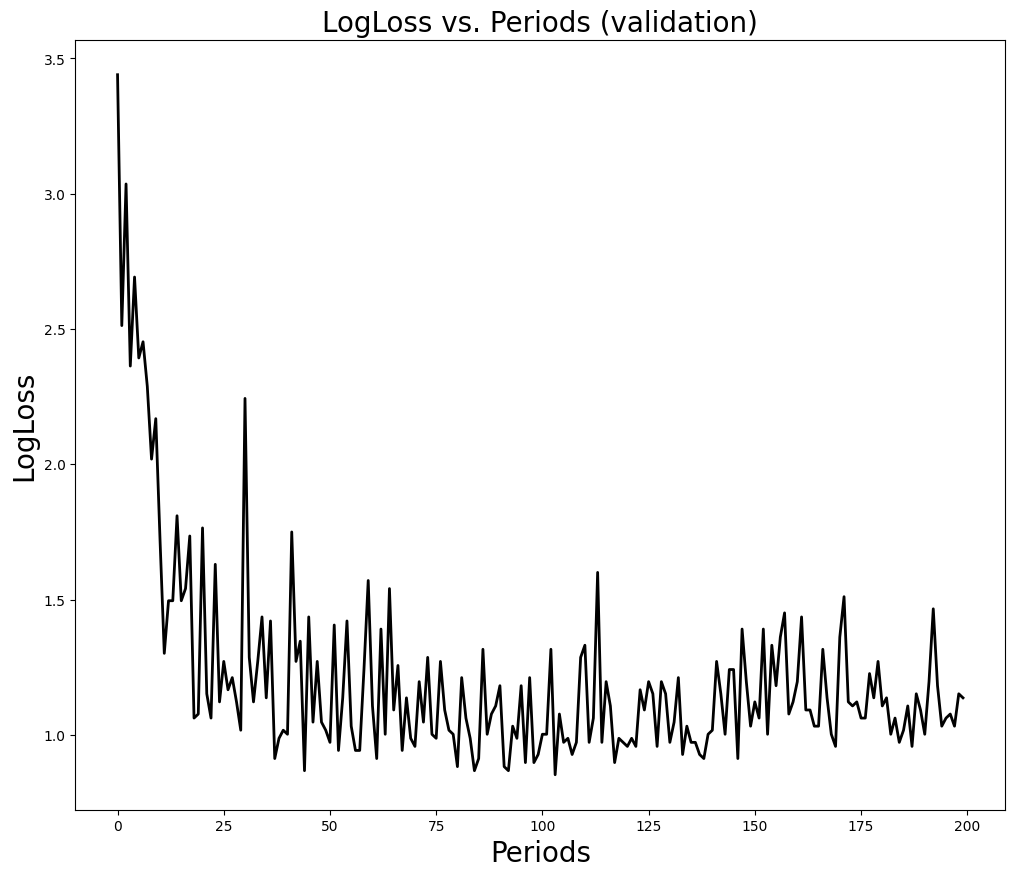

In [ ]:
accuracy = metrics.accuracy_score(y_test_n, final_predictions)
print("Final accuracy (on validation data): %0.2f" % accuracy)
plt.rcParams["figure.figsize"] = (12,10)
# Output a graph of loss metrics over periods.
plt.ylabel("LogLoss", fontsize = 20)
plt.xlabel("Periods", fontsize = 20)
plt.title("LogLoss vs. Periods (validation)", fontsize = 20)
plt.plot(validation_errors, 'k', linewidth = 2)
#plt.legend()
plt.show()

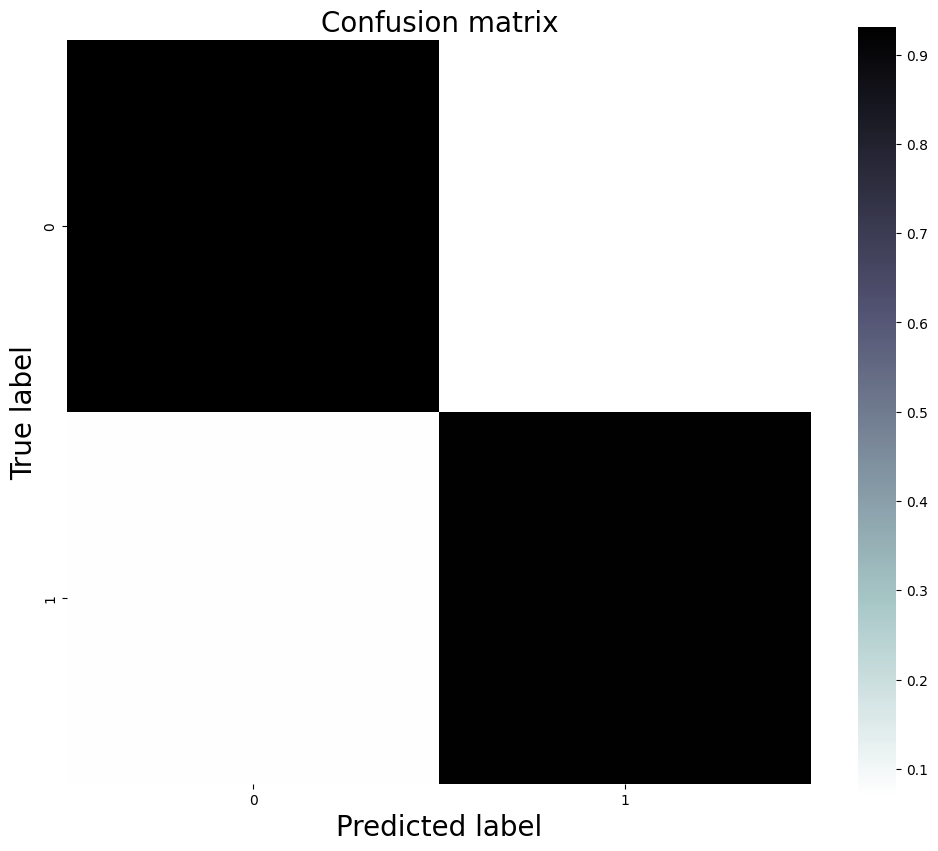

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,10)

cm = metrics.confusion_matrix(y_test_n, final_predictions)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class).
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

ax = sns.heatmap(cm_normalized, cmap="bone_r")
ax.set_aspect(1)
plt.title("Confusion matrix", fontsize = 20)
plt.ylabel("True label", fontsize = 20)
plt.xlabel("Predicted label", fontsize = 20)
plt.show()

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_test_n, final_predictions, labels=[0, 1])))

Classification report for classifier <tensorflow_estimator.python.estimator.canned.dnn.DNNClassifierV2 object at 0x7f77069f60e0>:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       494
           1       0.94      0.93      0.93       572

    accuracy                           0.93      1066
   macro avg       0.93      0.93      0.93      1066
weighted avg       0.93      0.93      0.93      1066




In [ ]:
accuracy = accuracy_score(y_test_n, final_predictions)
DNN_A = accuracy
print('Accuracy: {:.2f}%'.format(DNN_A * 100))

Accuracy: 92.87%


# DNN
## (200x100x50)

In [ ]:
model_1 = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

model_1 = tf.estimator.DNNClassifier(feature_columns=feat_cols, optimizer = legacy.Adam,
                                          hidden_units=[250, 100, 50],
                                          #dropout=0.025,
                                          #activation_fn = tf.nn.softmax,
                                          #optimizer='Adagrad',
                                          n_classes=2)

print("Training model_1...")
print("LogLoss error (on validation data):")
validation_errors = []
for period in range (0, 200):
# Train the model_1, starting from the prior state.
    model_1.train(
    input_fn=input_func,
    steps=500
    )
    pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
    y_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=y_test,batch_size=len(y_test),shuffle=False)

    validation_predictions = list(model_1.predict(input_fn=pred_fn))
    validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])
    validation_pred_class_id = np.array([item['class_ids'][0] for item in validation_predictions])
    validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,0)
    validation_log_loss = metrics.log_loss(y_test_n, validation_pred_one_hot)
    print(" period %02d : %0.2f" % (period, validation_log_loss))
    validation_errors.append(validation_log_loss)

Training model_1...
LogLoss error (on validation data):
 period 00 : 2.65


 period 01 : 2.60
 period 02 : 2.89
 period 03 : 2.42
 period 04 : 3.17
 period 05 : 2.35
 period 06 : 3.80
 period 07 : 2.23
 period 08 : 2.32
 period 09 : 1.79
 period 10 : 1.48
 period 11 : 1.41
 period 12 : 1.26
 period 13 : 1.39
 period 14 : 1.20
 period 15 : 1.33
 period 16 : 1.20
 period 17 : 1.48
 period 18 : 1.09
 period 19 : 1.11
 period 20 : 1.03
 period 21 : 1.39
 period 22 : 1.33
 period 23 : 1.14
 period 24 : 1.03
 period 25 : 1.12
 period 26 : 1.23
 period 27 : 1.06
 period 28 : 1.14
 period 29 : 1.02
 period 30 : 1.42
 period 31 : 1.11
 period 32 : 1.59
 period 33 : 1.44
 period 34 : 1.00
 period 35 : 1.72
 period 36 : 1.21
 period 37 : 1.84
 period 38 : 0.94
 period 39 : 1.08
 period 40 : 1.36
 period 41 : 1.45
 period 42 : 1.11


 period 43 : 1.12
 period 44 : 1.26
 period 45 : 1.00
 period 46 : 0.99
 period 47 : 1.23
 period 48 : 1.03
 period 49 : 1.00
 period 50 : 1.30
 period 51 : 1.03
 period 52 : 1.67
 period 53 : 1.45
 period 54 : 1.03
 period 55 : 0.96
 period 56 : 1.09
 period 57 : 0.96
 period 58 : 1.02
 period 59 : 0.96
 period 60 : 1.24


 period 61 : 1.18
 period 62 : 1.39
 period 63 : 1.32
 period 64 : 1.02
 period 65 : 0.97
 period 66 : 1.18
 period 67 : 1.06
 period 68 : 1.06
 period 69 : 1.57
 period 70 : 1.03
 period 71 : 1.27
 period 72 : 1.38
 period 73 : 1.36
 period 74 : 1.02
 period 75 : 1.36
 period 76 : 1.03
 period 77 : 0.93
 period 78 : 0.97
 period 79 : 0.97
 period 80 : 1.06
 period 81 : 1.39
 period 82 : 0.94
 period 83 : 1.00
 period 84 : 0.97
 period 85 : 1.08
 period 86 : 1.48
 period 87 : 1.26
 period 88 : 1.08
 period 89 : 1.09
 period 90 : 1.14
 period 91 : 1.06
 period 92 : 1.03
 period 93 : 1.05
 period 94 : 1.08
 period 95 : 1.24
 period 96 : 1.23
 period 97 : 1.24
 period 98 : 1.05
 period 99 : 0.96
 period 100 : 0.99
 period 101 : 1.32
 period 102 : 1.59
 period 103 : 1.17
 period 104 : 0.94
 period 105 : 0.99
 period 106 : 0.96
 period 107 : 1.06
 period 108 : 0.94
 period 109 : 1.38
 period 110 : 1.05
 period 111 : 1.33
 period 112 : 1.02
 period 113 : 1.08
 period 114 : 1.03
 period 115 :

 period 147 : 1.36
 period 148 : 1.20
 period 149 : 0.99
 period 150 : 1.00
 period 151 : 1.05
 period 152 : 0.99
 period 153 : 0.99
 period 154 : 1.08
 period 155 : 0.97
 period 156 : 1.08
 period 157 : 1.41
 period 158 : 0.99
 period 159 : 0.99
 period 160 : 1.02
 period 161 : 1.30
 period 162 : 0.99
 period 163 : 1.06
 period 164 : 0.99
 period 165 : 1.21
 period 166 : 1.06
 period 167 : 1.39
 period 168 : 0.99
 period 169 : 1.14
 period 170 : 1.17
 period 171 : 1.18
 period 172 : 0.93
 period 173 : 1.00
 period 174 : 1.12
 period 175 : 0.97
 period 176 : 1.02
 period 177 : 0.94
 period 178 : 0.96
 period 179 : 0.91


 period 180 : 0.97
 period 181 : 1.03
 period 182 : 1.03
 period 183 : 1.03
 period 184 : 1.12
 period 185 : 0.90
 period 186 : 1.05
 period 187 : 1.20
 period 188 : 1.14
 period 189 : 0.94
 period 190 : 1.29
 period 191 : 0.96
 period 192 : 0.87
 period 193 : 1.03
 period 194 : 1.15
 period 195 : 0.94
 period 196 : 1.02
 period 197 : 1.35
 period 198 : 0.88
 period 199 : 1.26


In [ ]:
final_predictions = model_1.predict(input_fn=pred_fn)
final_predictions = np.array([item['class_ids'][0] for item in final_predictions])

Final accuracy (on validation data): 0.92


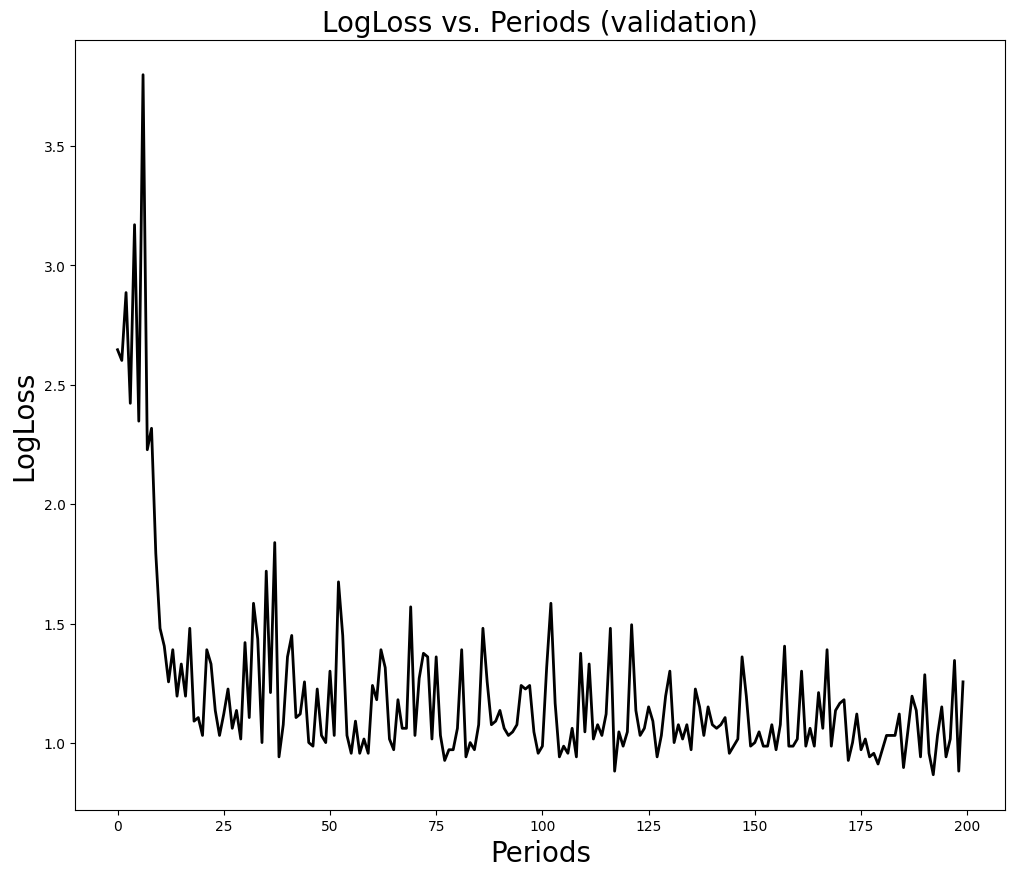

In [ ]:
accuracy = metrics.accuracy_score(y_test_n, final_predictions)
print("Final accuracy (on validation data): %0.2f" % accuracy)
plt.rcParams["figure.figsize"] = (12,10)
# Output a graph of loss metrics over periods.
plt.ylabel("LogLoss", fontsize = 20)
plt.xlabel("Periods", fontsize = 20)
plt.title("LogLoss vs. Periods (validation)", fontsize = 20)
plt.plot(validation_errors, 'k', linewidth = 2)
#plt.legend()
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (12,10)

cm = metrics.confusion_matrix(y_test_n, final_predictions)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class).
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

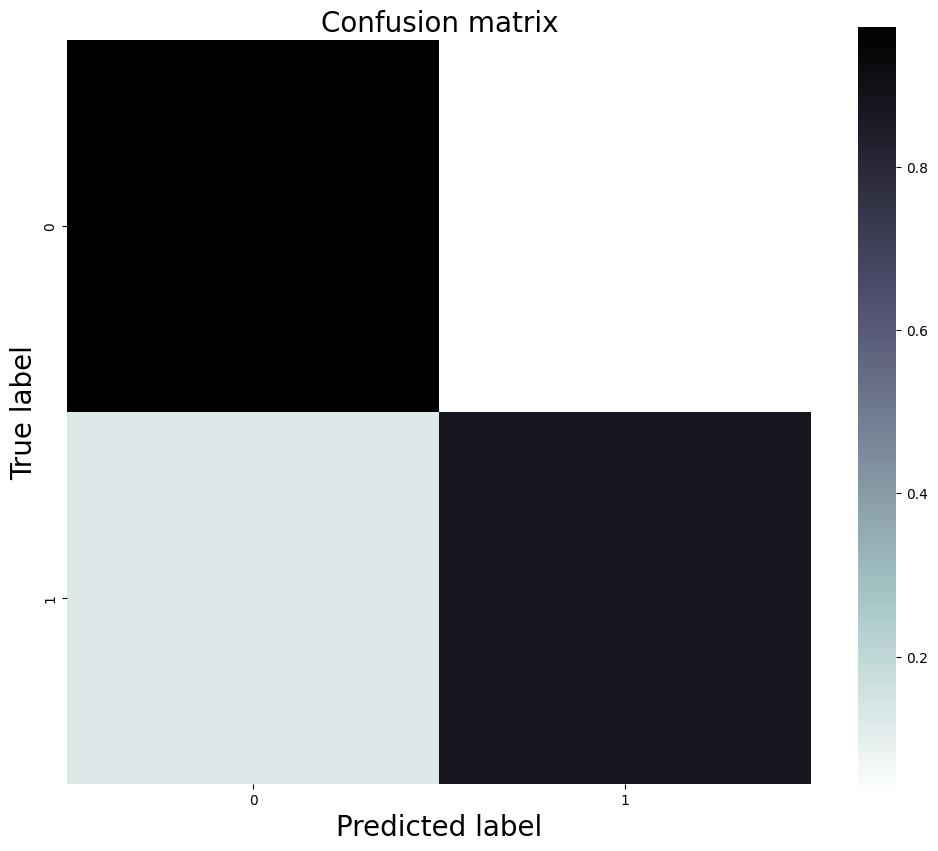

In [ ]:
ax = sns.heatmap(cm_normalized, cmap="bone_r")
ax.set_aspect(1)
plt.title("Confusion matrix", fontsize = 20)
plt.ylabel("True label", fontsize = 20)
plt.xlabel("Predicted label", fontsize = 20)
plt.show()

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (model_1, metrics.classification_report(y_test_n, final_predictions, labels=[0, 1])))

Classification report for classifier <tensorflow_estimator.python.estimator.canned.dnn.DNNClassifierV2 object at 0x7f76db3a1f00>:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       494
           1       0.97      0.88      0.92       572

    accuracy                           0.92      1066
   macro avg       0.92      0.92      0.92      1066
weighted avg       0.93      0.92      0.92      1066




In [ ]:
accuracy = accuracy_score(y_test_n, final_predictions)
DNN_B = accuracy
print('Accuracy: {:.2f}%'.format(DNN_B * 100))

Accuracy: 92.12%


# DNN
## (100, 50 25)

In [ ]:
model_2 = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

model_2 = tf.estimator.DNNClassifier(feature_columns=feat_cols, optimizer = legacy.Adam,
                                          hidden_units=[250, 100, 50],
                                          #dropout=0.025,
                                          #activation_fn = tf.nn.softmax,
                                          #optimizer='Adagrad',
                                          n_classes=2)

print("Training model_2...")
print("LogLoss error (on validation data):")
validation_errors = []
for period in range (0, 200):
# Train the model_2, starting from the prior state.
    model_2.train(
    input_fn=input_func,
    steps=500
    )
    pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
    y_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=y_test,batch_size=len(y_test),shuffle=False)

    validation_predictions = list(model_2.predict(input_fn=pred_fn))
    validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])
    validation_pred_class_id = np.array([item['class_ids'][0] for item in validation_predictions])
    validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,0)
    validation_log_loss = metrics.log_loss(y_test_n, validation_pred_one_hot)
    print(" period %02d : %0.2f" % (period, validation_log_loss))
    validation_errors.append(validation_log_loss)

Training model_2...
LogLoss error (on validation data):
 period 00 : 2.56
 period 01 : 2.65
 period 02 : 2.87
 period 03 : 2.63
 period 04 : 2.71
 period 05 : 2.69
 period 06 : 2.23
 period 07 : 2.11
 period 08 : 1.93
 period 09 : 1.78
 period 10 : 1.75
 period 11 : 1.59
 period 12 : 1.53
 period 13 : 1.78
 period 14 : 1.38
 period 15 : 1.39
 period 16 : 1.05
 period 17 : 1.30
 period 18 : 1.03
 period 19 : 2.20
 period 20 : 1.06
 period 21 : 2.26
 period 22 : 1.09
 period 23 : 1.53
 period 24 : 2.30
 period 25 : 1.39
 period 26 : 1.14
 period 27 : 1.14
 period 28 : 1.24
 period 29 : 0.91
 period 30 : 1.12
 period 31 : 1.17
 period 32 : 1.03
 period 33 : 1.14
 period 34 : 1.06
 period 35 : 0.91
 period 36 : 1.00
 period 37 : 1.32
 period 38 : 0.96
 period 39 : 0.96
 period 40 : 0.94
 period 41 : 1.09
 period 42 : 1.18
 period 43 : 1.18
 period 44 : 0.93
 period 45 : 0.99
 period 46 : 1.06
 period 47 : 0.97
 period 48 : 0.90
 period 49 : 0.97
 period 50 : 1.09
 period 51 : 0.93
 period 

In [ ]:
final_predictions = model_2.predict(input_fn=pred_fn)
final_predictions = np.array([item['class_ids'][0] for item in final_predictions])

Final accuracy (on validation data): 0.94


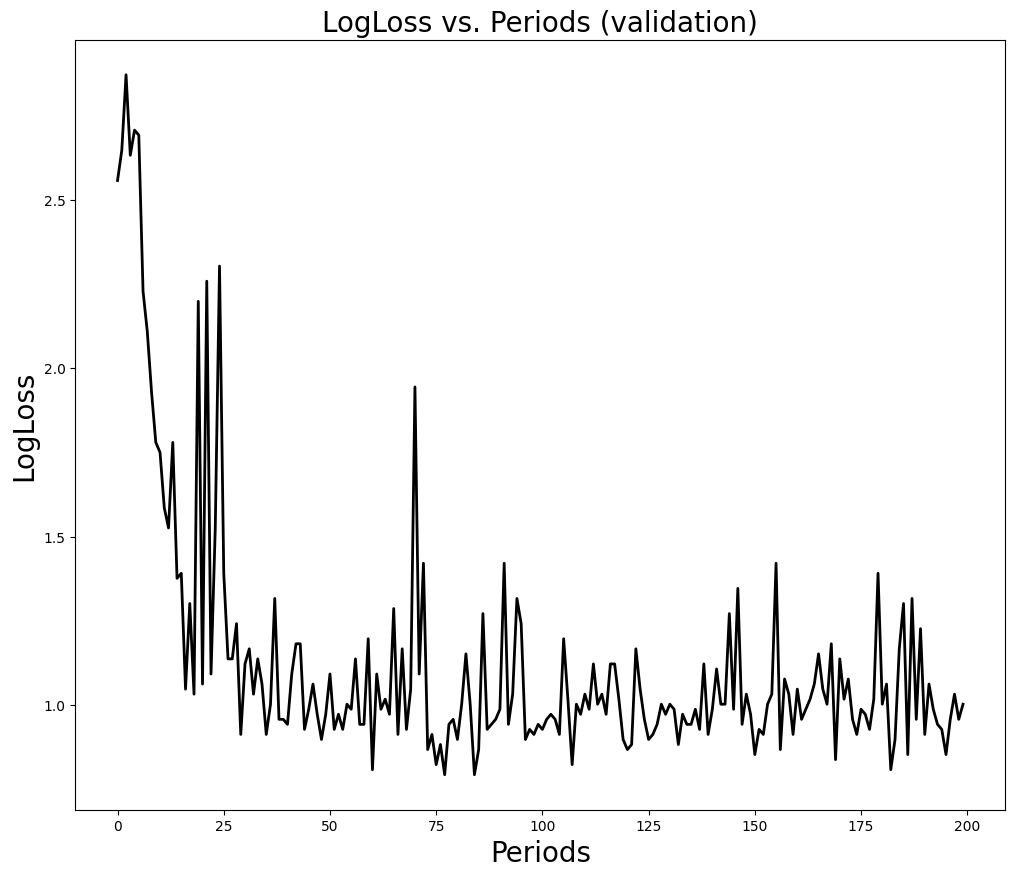

In [ ]:
accuracy = metrics.accuracy_score(y_test_n, final_predictions)
print("Final accuracy (on validation data): %0.2f" % accuracy)
plt.rcParams["figure.figsize"] = (12,10)
# Output a graph of loss metrics over periods.
plt.ylabel("LogLoss", fontsize = 20)
plt.xlabel("Periods", fontsize = 20)
plt.title("LogLoss vs. Periods (validation)", fontsize = 20)
plt.plot(validation_errors, 'k', linewidth = 2)
#plt.legend()
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (12,10)

cm = metrics.confusion_matrix(y_test_n, final_predictions)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class).
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

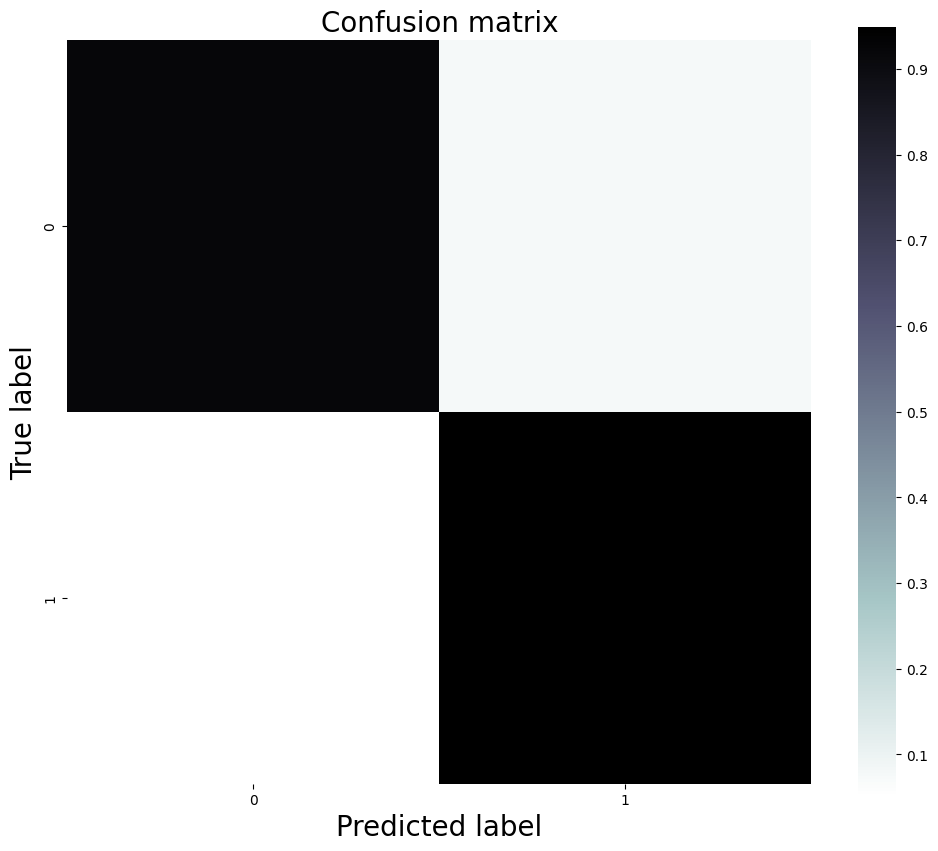

In [ ]:
ax = sns.heatmap(cm_normalized, cmap="bone_r")
ax.set_aspect(1)
plt.title("Confusion matrix", fontsize = 20)
plt.ylabel("True label", fontsize = 20)
plt.xlabel("Predicted label", fontsize = 20)
plt.show()

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (model_1, metrics.classification_report(y_test_n, final_predictions, labels=[0, 1])))

Classification report for classifier <tensorflow_estimator.python.estimator.canned.dnn.DNNClassifierV2 object at 0x7f76db3a1f00>:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       494
           1       0.93      0.95      0.94       572

    accuracy                           0.94      1066
   macro avg       0.94      0.94      0.94      1066
weighted avg       0.94      0.94      0.94      1066




In [ ]:
accuracy = accuracy_score(y_test_n, final_predictions)
DNN_C = accuracy
print('Accuracy: {:.2f}%'.format(DNN_C * 100))

Accuracy: 93.71%


# DNN
## (10, 5, 2)

In [ ]:
model_3 = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

model_3 = tf.estimator.DNNClassifier(feature_columns=feat_cols, optimizer = legacy.Adam,
                                          hidden_units=[10, 5, 2],
                                          #dropout=0.025,
                                          #activation_fn = tf.nn.softmax,
                                          #optimizer='Adagrad',
                                          n_classes=2)

print("Training model_3...")
print("LogLoss error (on validation data):")
validation_errors = []
for period in range (0, 200):
# Train the model_3, starting from the prior state.
    model_3.train(
    input_fn=input_func,
    steps=500
    )
    pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
    y_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=y_test,batch_size=len(y_test),shuffle=False)

    validation_predictions = list(model_3.predict(input_fn=pred_fn))
    validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])
    validation_pred_class_id = np.array([item['class_ids'][0] for item in validation_predictions])
    validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,0)
    validation_log_loss = metrics.log_loss(y_test_n, validation_pred_one_hot)
    print(" period %02d : %0.2f" % (period, validation_log_loss))
    validation_errors.append(validation_log_loss)

final_predictions = model_3.predict(input_fn=pred_fn)
final_predictions = np.array([item['class_ids'][0] for item in final_predictions])

Training model_3...
LogLoss error (on validation data):
 period 00 : 3.56
 period 01 : 2.48
 period 02 : 3.13
 period 03 : 2.59
 period 04 : 2.68
 period 05 : 2.54
 period 06 : 2.45
 period 07 : 2.51
 period 08 : 2.41
 period 09 : 2.48
 period 10 : 2.41
 period 11 : 2.30
 period 12 : 2.24
 period 13 : 2.21
 period 14 : 2.18
 period 15 : 2.09
 period 16 : 2.06
 period 17 : 1.91
 period 18 : 2.05
 period 19 : 1.82
 period 20 : 1.57
 period 21 : 1.48
 period 22 : 1.44
 period 23 : 1.57
 period 24 : 1.36
 period 25 : 1.33
 period 26 : 1.65
 period 27 : 1.33
 period 28 : 1.09
 period 29 : 1.39
 period 30 : 1.27
 period 31 : 1.66
 period 32 : 1.42
 period 33 : 1.18
 period 34 : 1.75
 period 35 : 1.00
 period 36 : 1.27
 period 37 : 1.23
 period 38 : 1.66
 period 39 : 1.24
 period 40 : 1.23
 period 41 : 0.97
 period 42 : 1.02
 period 43 : 1.23
 period 44 : 1.24
 period 45 : 1.20
 period 46 : 1.08
 period 47 : 1.18
 period 48 : 1.00
 period 49 : 1.99
 period 50 : 0.88
 period 51 : 1.42
 period 

Final accuracy (on validation data): 0.94


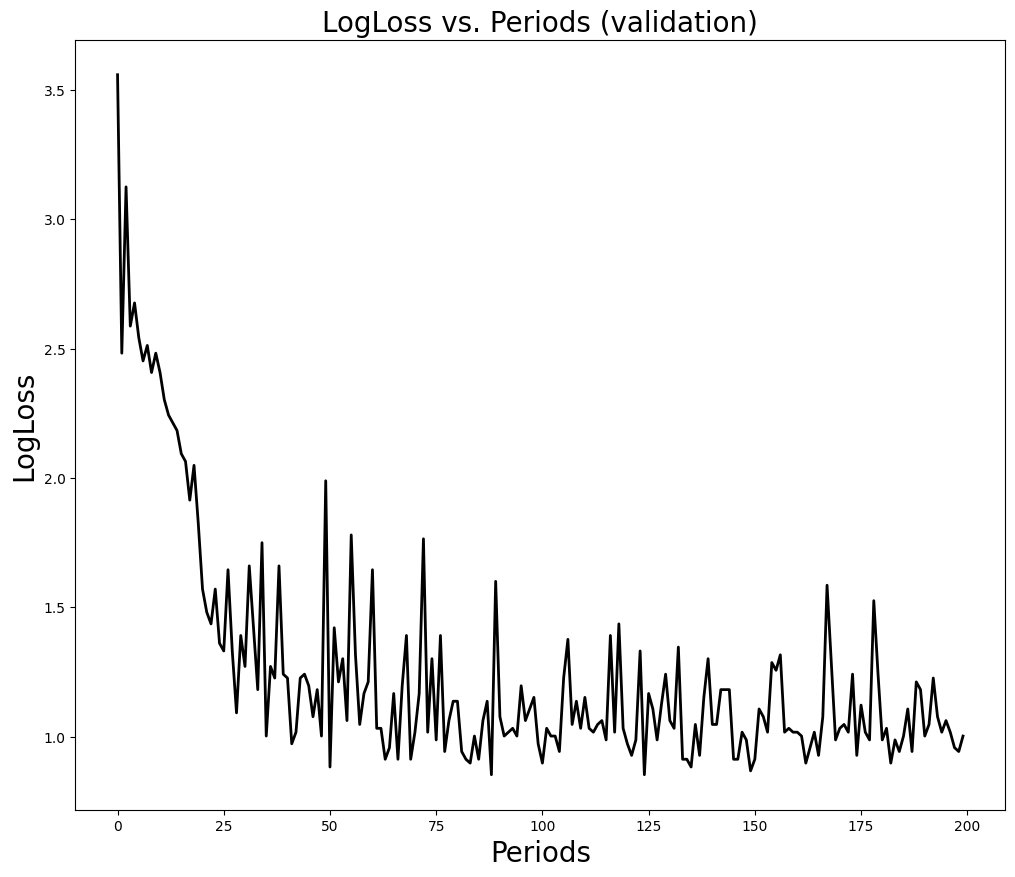

In [ ]:
accuracy = metrics.accuracy_score(y_test_n, final_predictions)
print("Final accuracy (on validation data): %0.2f" % accuracy)
plt.rcParams["figure.figsize"] = (12,10)
# Output a graph of loss metrics over periods.
plt.ylabel("LogLoss", fontsize = 20)
plt.xlabel("Periods", fontsize = 20)
plt.title("LogLoss vs. Periods (validation)", fontsize = 20)
plt.plot(validation_errors, 'k', linewidth = 2)
#plt.legend()
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (12,10)

cm = metrics.confusion_matrix(y_test_n, final_predictions)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class).
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

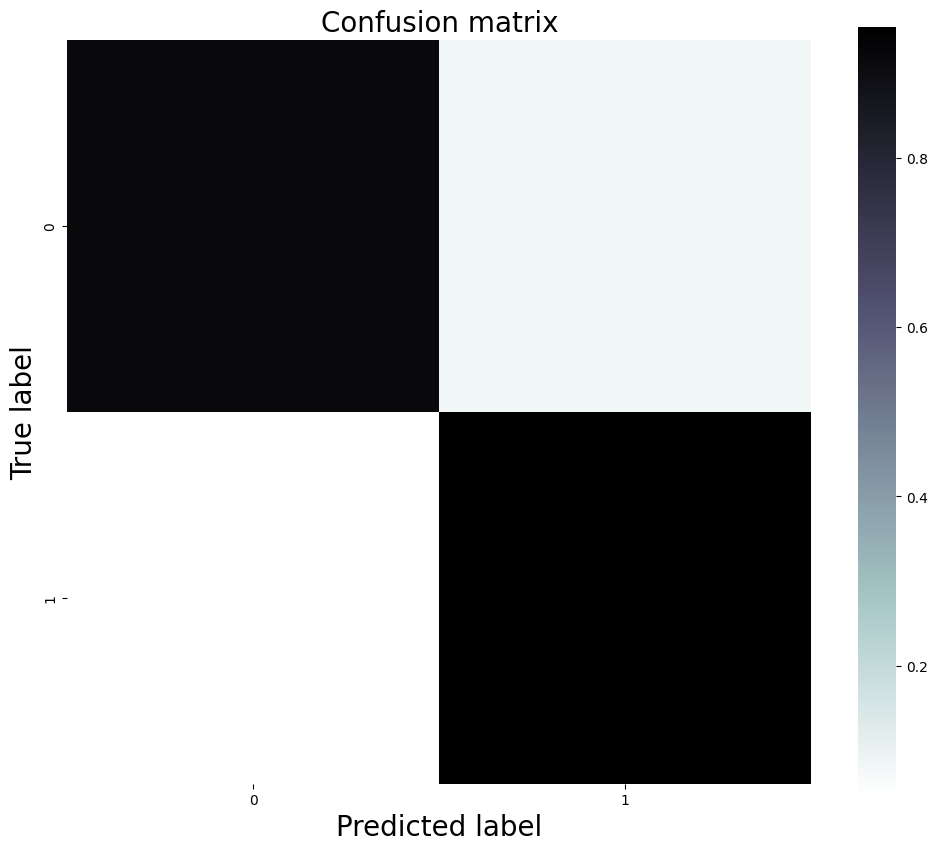

In [ ]:
ax = sns.heatmap(cm_normalized, cmap="bone_r")
ax.set_aspect(1)
plt.title("Confusion matrix", fontsize = 20)
plt.ylabel("True label", fontsize = 20)
plt.xlabel("Predicted label", fontsize = 20)
plt.show()

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (model_3, metrics.classification_report(y_test_n, final_predictions, labels=[0, 1])))

accuracy = accuracy_score(y_test_n, final_predictions)
DNN_D = accuracy
print('Accuracy: {:.2f}%'.format(DNN_D * 100))

Classification report for classifier <tensorflow_estimator.python.estimator.canned.dnn.DNNClassifierV2 object at 0x7f76a648ee00>:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       494
           1       0.93      0.95      0.94       572

    accuracy                           0.94      1066
   macro avg       0.94      0.94      0.94      1066
weighted avg       0.94      0.94      0.94      1066


Accuracy: 93.71%


# SVM

## SVM with bagging

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

svm = SVC(kernel='rbf', gamma='scale')
bagging_svm = BaggingClassifier(base_estimator=svm, n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), random_state=42)

In [ ]:
y_pred = bagging_svm.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
confusion = print(confusion_matrix(y_test_n, y_pred))
confusion

[[412  82]
 [ 90 482]]


In [ ]:
print(classification_report(y_test_n, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       494
           1       0.85      0.84      0.85       572

    accuracy                           0.84      1066
   macro avg       0.84      0.84      0.84      1066
weighted avg       0.84      0.84      0.84      1066



In [ ]:
accuracy = accuracy_score(y_test_n, y_pred)
SVM_with_Bagging = accuracy
print('Accuracy: {:.2f}%'.format(SVM_with_Bagging * 100))

Accuracy: 83.86%


## SVM with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=6)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train_selected, y_train)

sv_classifier = grid.best_estimator_

In [ ]:
svm_two = sv_classifier.fit(X_train, y_train)

In [ ]:
y_pred_svm_two = svm_two.predict(X_test)
confusion = confusion_matrix(y_test_n, y_pred_svm_two)
print(confusion)

[[455  39]
 [ 38 534]]


<Axes: >

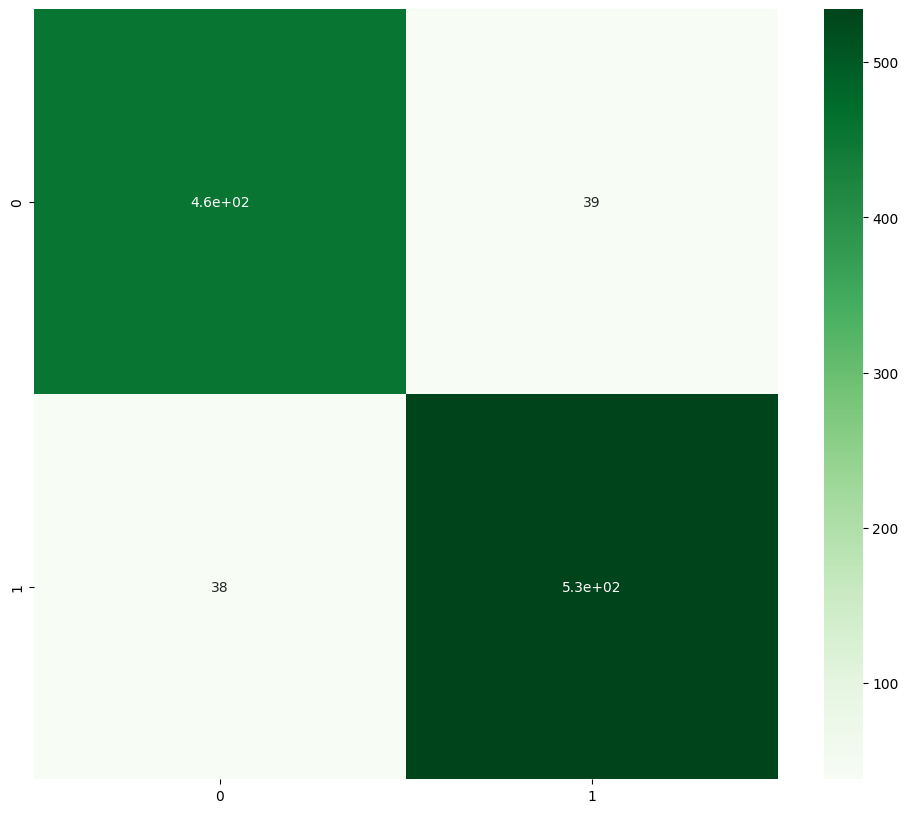

In [ ]:
import seaborn as sns
sns.heatmap(confusion, annot=True, cmap = 'Greens')

In [ ]:
print(classification_report(y_test_n, y_pred_svm_two))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       494
           1       0.93      0.93      0.93       572

    accuracy                           0.93      1066
   macro avg       0.93      0.93      0.93      1066
weighted avg       0.93      0.93      0.93      1066



In [ ]:
accuracy = accuracy_score(y_test_n, y_pred_svm_two)
SVM_with_GridSearch = accuracy
print('Accuracy: {:.2f}%'.format(SVM_with_GridSearch * 100))

Accuracy: 92.78%


# XG Boost

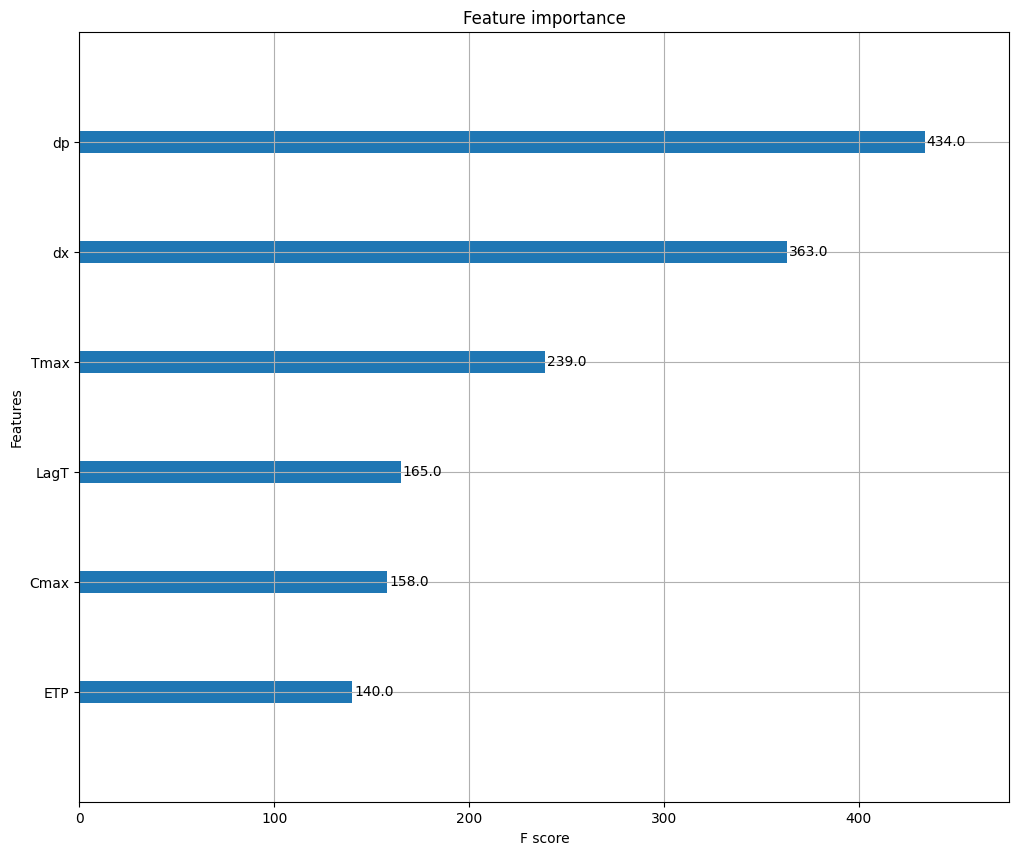

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       494
           1       0.96      0.97      0.97       572

    accuracy                           0.96      1066
   macro avg       0.96      0.96      0.96      1066
weighted avg       0.96      0.96      0.96      1066



In [ ]:
import xgboost as xgb

xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)

xgb.plot_importance(xg)
plt.show()

y_pred = xg.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
XGBoost = accuracy
print('Accuracy: {:.2f}%'.format(XGBoost * 100))

Accuracy: 96.25%


# Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision = DecisionTreeClassifier(max_depth=3)

decision.fit(X_train, y_train)

y_pred = decision.predict(X_test)

classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       494
           1       0.98      0.94      0.96       572

    accuracy                           0.96      1066
   macro avg       0.96      0.96      0.96      1066
weighted avg       0.96      0.96      0.96      1066



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
Decision_Tree = accuracy
print('Accuracy: {:.2f}%'.format(Decision_Tree * 100))

Accuracy: 95.59%


# Catboost

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 11.3 MB/s eta 0:00:00


Learning rate set to 0.015199
0:	learn: 0.6636516	total: 49.7ms	remaining: 49.6s
1:	learn: 0.6370380	total: 52.5ms	remaining: 26.2s
2:	learn: 0.6160317	total: 54.6ms	remaining: 18.1s
3:	learn: 0.5948349	total: 57.6ms	remaining: 14.3s
4:	learn: 0.5723419	total: 59.8ms	remaining: 11.9s
5:	learn: 0.5552507	total: 62.1ms	remaining: 10.3s
6:	learn: 0.5352486	total: 64.3ms	remaining: 9.12s
7:	learn: 0.5140205	total: 66.6ms	remaining: 8.26s
8:	learn: 0.4982071	total: 68.8ms	remaining: 7.58s
9:	learn: 0.4807157	total: 71.3ms	remaining: 7.06s
10:	learn: 0.4629502	total: 73.5ms	remaining: 6.61s
11:	learn: 0.4489521	total: 75.8ms	remaining: 6.24s
12:	learn: 0.4367171	total: 78.6ms	remaining: 5.97s
13:	learn: 0.4256574	total: 81.6ms	remaining: 5.75s
14:	learn: 0.4122987	total: 84.5ms	remaining: 5.54s
15:	learn: 0.4016026	total: 86.9ms	remaining: 5.34s
16:	learn: 0.3880280	total: 98.2ms	remaining: 5.68s
17:	learn: 0.3775876	total: 105ms	remaining: 5.73s
18:	learn: 0.3653659	total: 115ms	remaining: 

<Axes: >

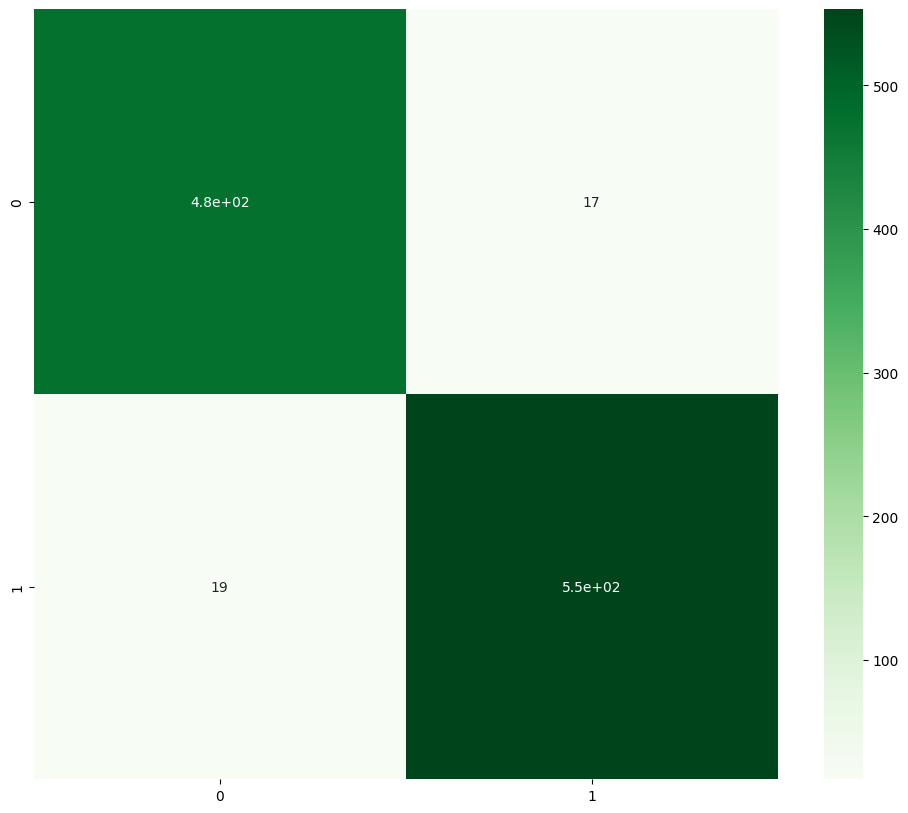

In [ ]:
import catboost
from catboost import CatBoostClassifier

catboost_classifier = CatBoostClassifier()

catboost_classifier.fit(X_train, y_train)

y_pred_cat = catboost_classifier.predict(X_test)
cat_heat = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cat_heat, annot = True, cmap = 'Greens')

In [ ]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       494
           1       0.97      0.97      0.97       572

    accuracy                           0.97      1066
   macro avg       0.97      0.97      0.97      1066
weighted avg       0.97      0.97      0.97      1066



In [ ]:
accuracy = accuracy_score(y_test, y_pred_cat)
CatBoost = accuracy
print('Accuracy: {:.2f}%'.format(CatBoost * 100))

Accuracy: 96.62%


# Comparison table and plot for different models






In [ ]:
accuracies = {'Models' : ['DNN_(500 X 250 X 100)', 'DNN_(200 X 100 X 50)', 'DNN_(100, 50, 25)', 'DNN_(10 X 5 X 2)', 'SVM_with_Bagging', 'SVM_with_GridSearch', 'XGBoost', 'Decision_Tree', 'CatBoost'],
              'Accuracies' : [DNN_A*100,DNN_B*100, DNN_C*100, DNN_D*100, SVM_with_Bagging*100, SVM_with_GridSearch*100, XGBoost*100, Decision_Tree*100, CatBoost*100]}
all_accuracies = pd.DataFrame(accuracies)

sorted_accuracies = all_accuracies.sort_values('Accuracies').reset_index().drop(columns = 'index', axis = 0)
sorted_accuracies

,Models,Accuracies
0,SVM_with_Bagging,83.864916
1,DNN_(200 X 100 X 50),92.120075
2,SVM_with_GridSearch,92.776735
3,DNN_(500 X 250 X 100),92.870544
4,"DNN_(100, 50, 25)",93.714822
5,DNN_(10 X 5 X 2),93.714822
6,Decision_Tree,95.590994
7,XGBoost,96.247655
8,CatBoost,96.622889


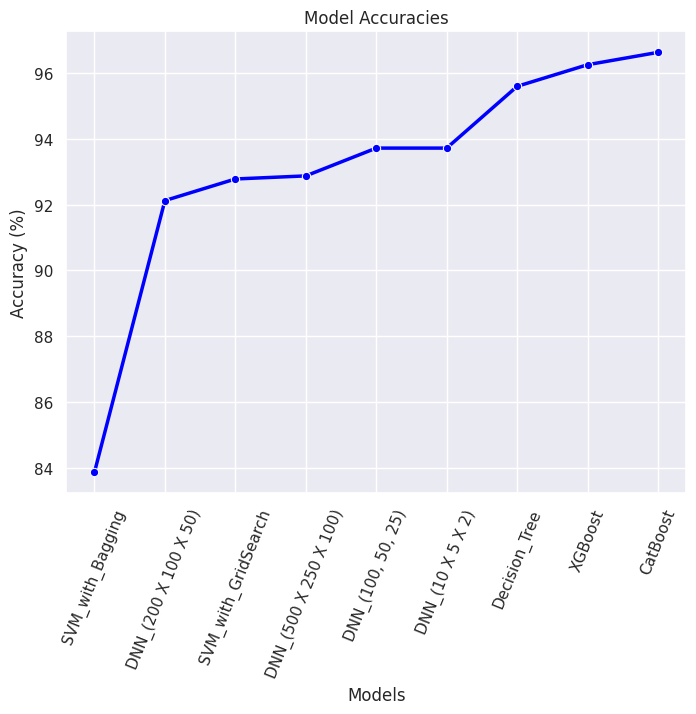

In [ ]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(x=sorted_accuracies.index, y='Accuracies', data=sorted_accuracies, marker='o', color='blue', linewidth=2.5)

plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xticks(range(0, 9), sorted_accuracies['Models'], rotation = 68)

plt.show()

Hyperparaments employed:-

1. DNN: In case of DNN's, we used a few different hyperaparameters:
  
  1.1. Feature columns: It is somewhat of a standard hyperparameter which specifies the feature columnn used. We used 6 different feature columns.
  
  1.2. Optimizer: For our purpose of studies we used, 'adam' optimizer. It is the most widely used optimizer used for updating the model's parameters during training.

  1.3. Hidden unit: For defining the architecutre of the deep neural network, we have used a set of three hidden layers including - (500, 250, 100), (200, 100, 50), (100, 50, 25) and (10, 5, 2).

  1.4. n_classes: These represent the classes that we want to classify. For our case, we are classifying 'clot_size' into '0' and '1'.


 2. Support Vector Machine:

  2.1. With Bagging: For kernel - 'rbf' and gamma = 'scale', we performed SVM for classification of out target with bagging. And the for bagging, the hyperparameters used are: 'n_estimators' to define the base estimators used which in out case were 10.

  2.2. With GridSearchCV: In this case, although it is a manner of exhaustive search which finds the best pyperparameters itself, gridsearchCV it self has parameters including:      

      2.2.1. SelectKBest: It selects top k feature with the highest scores based on the 'f_classif' function and computes ANOVA F-value between each feature and the target variable. For our purpose, we specified 'K = 6', meaning top 6 feature with highest scores will be selected.\

      2.2.2. GridSearchCV: It hold the values to the hyperparameters being tuned kernel, C, and gamma.

      2.2.3. cv: It specifies number of folds for cross-validaion, it is set to 5, indicating a 5 - fold cross-validation strategy.  

3. Decision Tree:
  
  3.1 max_depth: It is the hyperparamter in the DecisionTreeClassifier that is set to depth = 3 which restricts the maximum depth of the decision tree to 3 levels.

4. XGBoost: For our XGBoost based classification, not much of hyperparameter  
  tuning was invovled. XGBClassifier() was simply fit to training dataset with it's in-built setting.

5. CatBoost: Again, it is also a gradient boosting algorithm which was used for
  categorical data analysis of our target data. CatBoostClassifier() was simply fit to the training data with it's in-built settings.   

# Results

We got the results for classification of the clot sizes using different methods for classsification tasks which included Deep Neural Networks (DNN's), Support Vector Machine (SVM) with bagging and gridsearchCV, Decision Tree, XGBoost and CatBoost. The classification is based as such that '0' means normal reponse to wound/injury which would result in clotting and '1' suggests that there is thrombosis in patients.

Whilst using DNN with different hidden nodes architechtures which were (500, 250, 100), (200, 100, 50), (100, 50, 25) and (10, 5, 2). All these architectures gave good results which had accuracies above 90% suggesting good classification between normal response versus thrombosis in patients.

Support Vector Machine was also employed for our binary classification task for our target feature as well. SVM combined with an ensemble method of bagging gave a result which was only ~83% in accuracy, however, SVM with GridSearchCV allowed for a broader search of hyperparameters which allowed the accuracy to be increased to more then 90%. Also, to be noted that SVM without bagging and gridsearch was also performed but gave the same result as the SVM with bagging, hence was removed.

Decision Tree gave a good accuracy for the classification as well having an accruacy above 90% for the depth of the decision tree set to 3 levels.

Higher level gradient boosting algorithms were also employed which included XGBoost and CatBoost for classification between patients for response types. Both algorithms showed good classification with accuracies above 95%. Not special hyperparameter were tuned for this, both the algorithms were used with default parameters.

Seeing the confustion matrix of most of all the machine learning classification that we used, all of them had high True Negative and True Positives and and minor Type- I and Type - II errors suggesting that the calssification for the normal clotting and thrombotic patients was quite accurate.